In [1]:
import sys
import os
import numpy as np
from pathlib import Path


# Add the project root directory to Python path
project_root = str(Path(os.getcwd()).parent)
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
import matplotlib.pyplot as plt

from utils.plots import EDAPlots

# Natural Gas Price Visualizations

In [19]:
cols_to_load = ['Date', 'Weekly Natural Gas Futures Contract 1  (Dollars per Million Btu)']
price_df = pd.read_excel("../data/futures_price.xls", sheet_name='Data 2', header=2, usecols=cols_to_load).rename(columns={'Weekly Natural Gas Futures Contract 1  (Dollars per Million Btu)': 'Price_Mbtu'})
price_df = price_df.loc[price_df['Date'] >= '2010-01-01']
price_df['Year'] = price_df['Date'].dt.year
price_df['DayOfYear'] = price_df['Date'].dt.dayofyear
price_df


,Date,Price_Mbtu,Year,DayOfYear
836,2010-01-01,5.770,2010,1
837,2010-01-08,5.818,2010,8
838,2010-01-15,5.610,2010,15
839,2010-01-22,5.625,2010,22
840,2010-01-29,5.350,2010,29
...,...,...,...,...
1576,2024-03-08,1.885,2024,68
1577,2024-03-15,1.705,2024,75
1578,2024-03-22,1.698,2024,82
1579,2024-03-29,1.668,2024,89


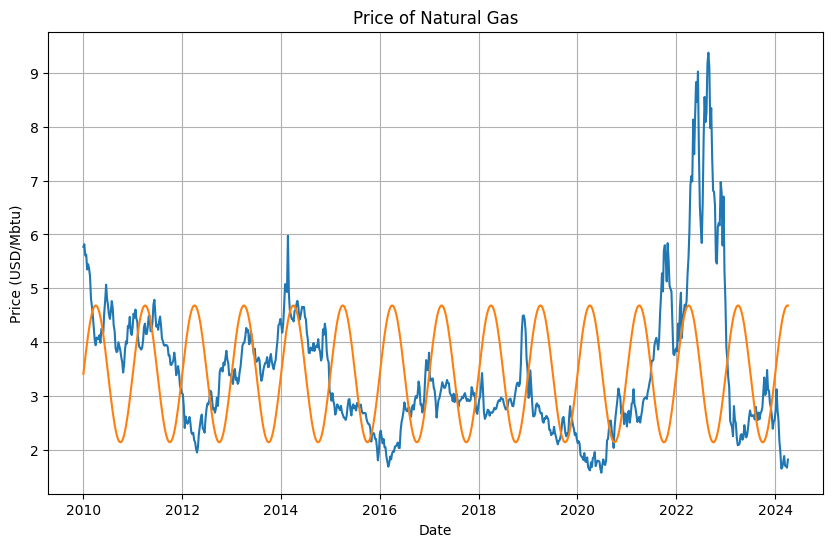

In [20]:
price_df = price_df.set_index('Date')
t_days = (price_df.index - price_df.index[0]).days.values.astype(float)
omega = 2 * np.pi / 365.25

mean_price = price_df['Price_Mbtu'].mean()
amp = price_df['Price_Mbtu'].std()  
phase = 0.0 

season = mean_price + amp * np.sin(omega * t_days + phase)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(price_df.index, price_df['Price_Mbtu'])
ax.plot(price_df.index, season)
ax.set_title('Price of Natural Gas')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD/Mbtu)')
ax.grid(True)
plt.show()

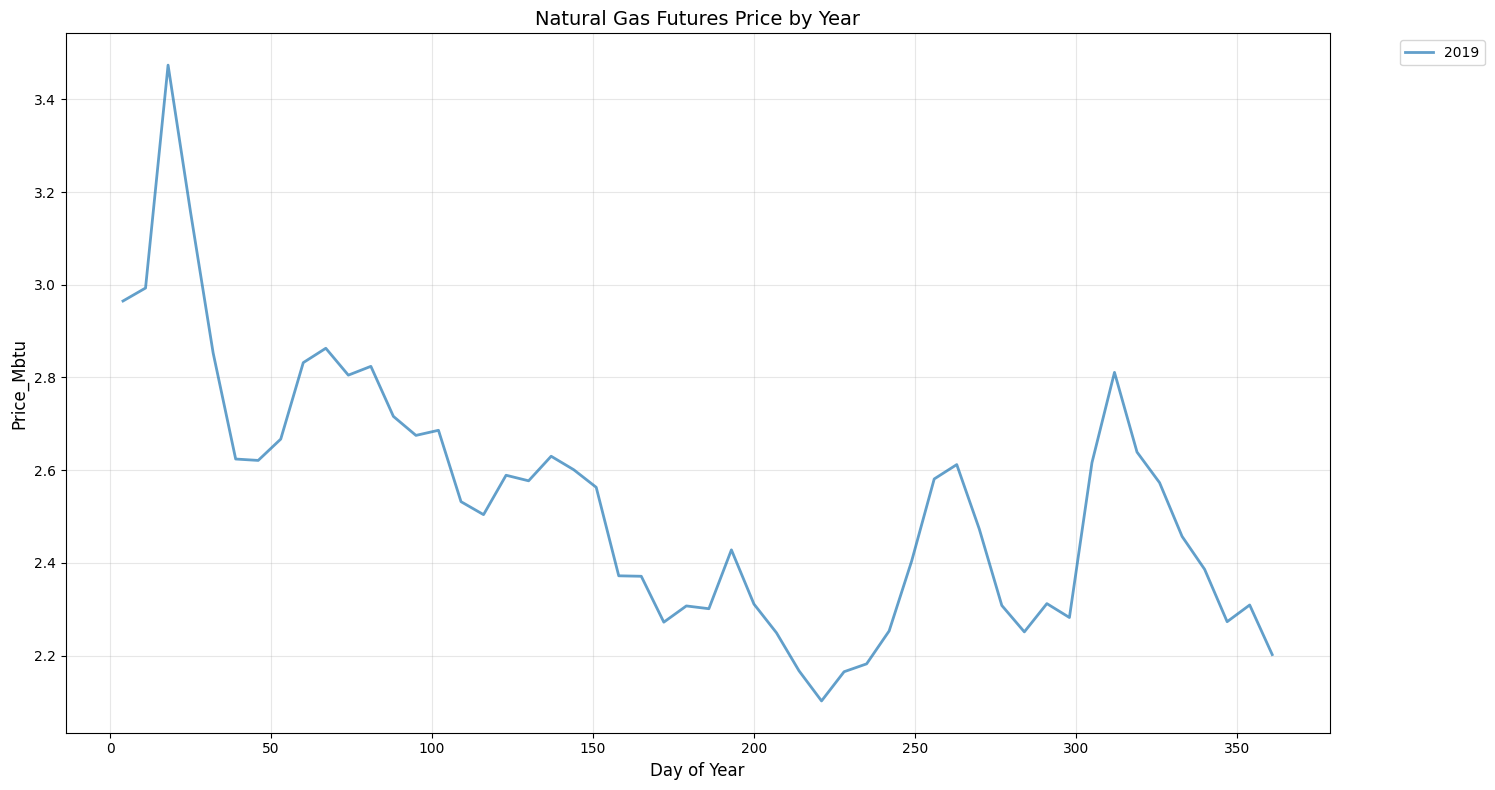

In [11]:
EDAPlots.generate_year_plot(price_df[price_df['Year'] == 2019], 'Price_Mbtu', 'Natural Gas Futures Price by Year')

### Log Returns

Log Returns allows us to focus on short term (weekly) price movements more accurately. They look inherently more gaussian (see graph below) and are scale-independent (no need to worry about inflation), which makes them easier to model.

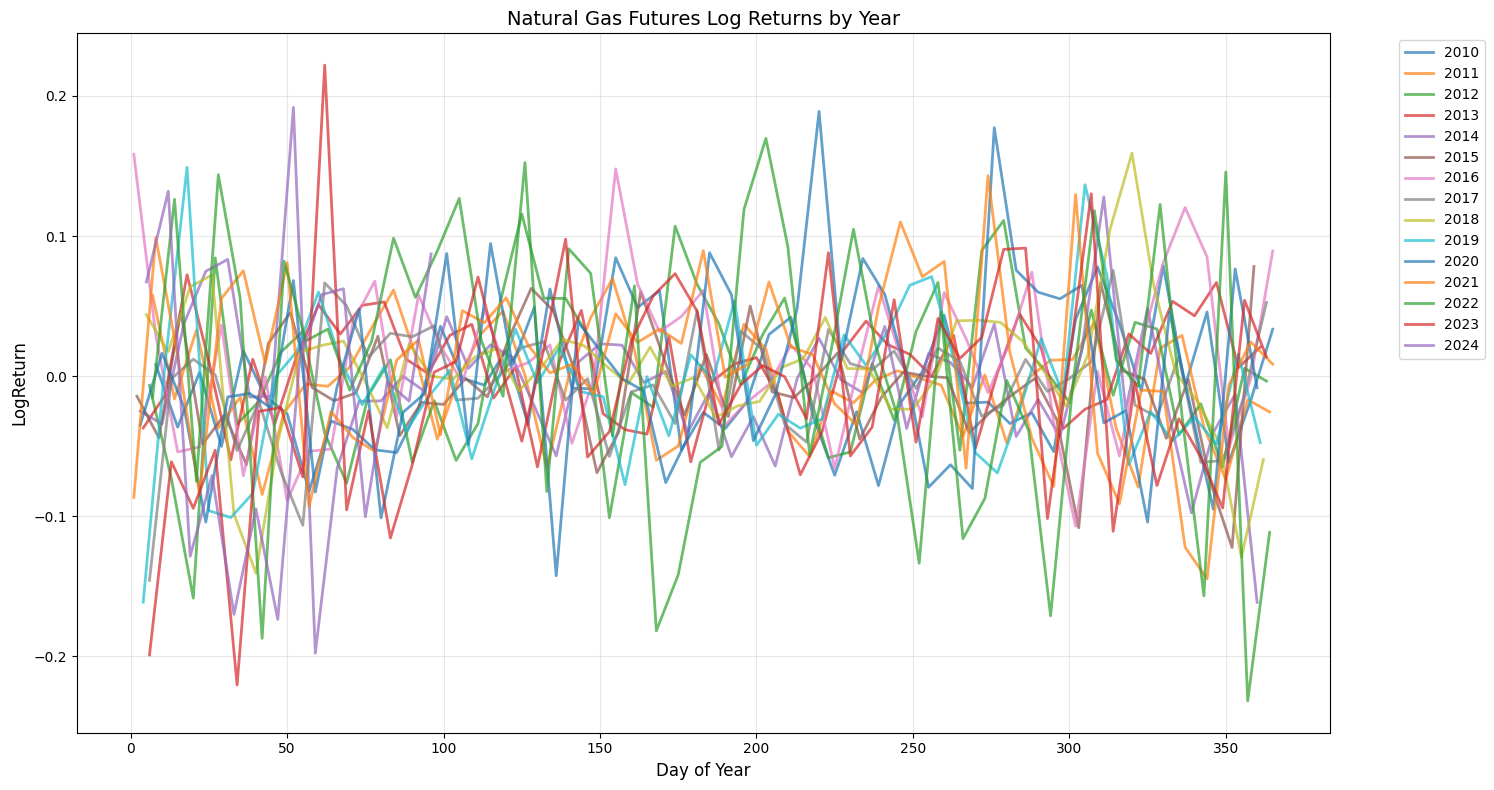

In [4]:
price_df.sort_values(by='Date', ascending=True)
price_df['LogReturn'] = np.log(price_df['Price_Mbtu'] / price_df['Price_Mbtu'].shift(1))

EDAPlots.generate_year_plot(price_df, 'LogReturn', 'Natural Gas Futures Log Returns by Year')

In [5]:
price_df['Week'] = price_df['Date'].dt.isocalendar().week
price_df['Year'] = price_df['Date'].dt.year
price_df = price_df.drop(columns=['Date'])
price_df.to_csv("../data/output/price_features.csv", index=False)
price_df

,Price_Mbtu,Year,DayOfYear,LogReturn,Week
836,5.770,2010,1,NaN,53
837,5.818,2010,8,0.008284,1
838,5.610,2010,15,-0.036406,2
839,5.625,2010,22,0.002670,3
840,5.350,2010,29,-0.050124,4
...,...,...,...,...,...
1576,1.885,2024,68,0.062383,10
1577,1.705,2024,75,-0.100363,11
1578,1.698,2024,82,-0.004114,12
1579,1.668,2024,89,-0.017826,13
